In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score
from sqlalchemy import column


In [11]:
# read in the dataset
df = pd.read_csv('data/breast_cancer.csv')

# take a look at the data
df.head(5)


,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant,benign
17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
# check dataset size
df.shape


(569, 4)

In [13]:
# split data into inputs and targets
X = df.drop(columns=['benign'])
y = df['benign']


In [31]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)
X_train


,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant
8.888,14.64,58.79,244.0,0.09783,0.15310,0.086060,0.028720,0.1902,0.08980,0.5262,0.8522,3.168,25.44,0.017210,0.093680,0.056710,0.017660,0.02541,0.021930,9.733,15.67,62.56,284.4,0.1207,0.24360,0.14340,0.04786,0.2254,0.10840
13.460,28.21,85.89,562.1,0.07517,0.04726,0.012710,0.011170,0.1421,0.05763,0.1689,1.1500,1.400,14.91,0.004942,0.012030,0.007508,0.005179,0.01442,0.001684,14.690,35.63,97.11,680.6,0.1108,0.14570,0.07934,0.05781,0.2694,0.07061
12.830,15.73,82.89,506.9,0.09040,0.08269,0.058350,0.030780,0.1705,0.05913,0.1499,0.4875,1.195,11.64,0.004873,0.017960,0.033180,0.008360,0.01601,0.002289,14.090,19.35,93.22,605.8,0.1326,0.26100,0.34760,0.09783,0.3006,0.07802
11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,0.1495,0.05888,0.4062,1.2100,2.635,28.47,0.005857,0.009758,0.011680,0.007445,0.02406,0.001769,12.980,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563
11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.021870,0.019650,0.01580,0.003442,11.920,15.77,76.53,434.0,0.1367,0.18220,0.08669,0.08611,0.2102,0.06784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19.000,18.91,123.40,1138.0,0.08217,0.08028,0.092710,0.056270,0.1946,0.05044,0.6896,1.3420,5.216,81.23,0.004428,0.027310,0.040400,0.013610,0.02030,0.002686,22.320,25.73,148.20,1538.0,0.1021,0.22640,0.32070,0.12180,0.2841,0.06541
12.300,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,0.05945,0.1840,1.5320,1.199,13.24,0.007881,0.008432,0.007004,0.006522,0.01939,0.002222,13.350,28.46,84.53,544.3,0.1222,0.09052,0.03619,0.03983,0.2554,0.07207
12.270,17.92,78.41,466.1,0.08685,0.06526,0.032110,0.026530,0.1966,0.05597,0.3342,1.7810,2.079,25.79,0.005888,0.023100,0.020590,0.010750,0.02578,0.002267,14.100,28.88,89.00,610.2,0.1240,0.17950,0.13770,0.09532,0.3455,0.06896
15.460,19.48,101.70,748.9,0.10920,0.12230,0.146600,0.080870,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.006240,0.014840,0.028130,0.010930,0.01397,0.002461,19.260,26.00,124.90,1156.0,0.1546,0.23940,0.37910,0.15140,0.2837,0.08019


In [15]:
# 合并 X_train 和 y_train
X_y_train = X_train.copy()
X_y_train.insert(loc=len(X_y_train.columns), column='benign', value=y_train)
X_y_train

,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant,benign
13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,0.3191,1.2490,2.2840,26.450,0.006739,0.02251,0.02086,0.013520,0.01870,0.003747,15.11,25.63,99.43,701.9,0.1425,0.2566,0.1935,0.12840,0.2849,0.09031,1
13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,0.1639,1.1400,1.2230,14.660,0.005919,0.03270,0.04957,0.010380,0.01208,0.004076,14.26,22.75,91.99,632.1,0.1025,0.2531,0.3308,0.08978,0.2048,0.07628,1
14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,0.2446,0.4334,1.8260,23.310,0.003271,0.01770,0.02310,0.008399,0.01148,0.002379,17.18,18.22,112.00,906.6,0.1065,0.2791,0.3151,0.11470,0.2688,0.08273,1
12.46,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,0.06249,0.3642,1.0400,2.5790,28.320,0.006530,0.03369,0.04712,0.014030,0.02740,0.004651,13.46,23.07,88.13,551.3,0.1050,0.2158,0.1904,0.07625,0.2685,0.07764,1
12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,0.1199,0.8944,0.8484,9.227,0.003457,0.01047,0.01167,0.005558,0.01251,0.001356,13.29,27.49,85.56,544.1,0.1184,0.1963,0.1937,0.08442,0.2983,0.07185,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270,0.1904,0.5293,1.1640,13.170,0.006472,0.01122,0.01282,0.008849,0.01692,0.002817,12.32,16.18,78.27,457.5,0.1358,0.1507,0.1275,0.08750,0.2733,0.08022,1
11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,0.3135,2.4260,2.1500,23.130,0.009861,0.02418,0.04275,0.009215,0.02475,0.002128,13.12,38.81,86.04,527.8,0.1406,0.2031,0.2923,0.06835,0.2884,0.07220,1
19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,0.06552,1.1110,1.1610,7.2370,133.000,0.006056,0.03203,0.05638,0.017330,0.01884,0.004787,25.93,26.24,171.10,2053.0,0.1495,0.4116,0.6121,0.19800,0.2968,0.09929,0
20.34,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.15040,0.2569,0.06670,0.5702,1.0230,4.0120,69.060,0.005485,0.02431,0.03190,0.013690,0.02768,0.003345,25.30,31.86,171.10,1938.0,0.1592,0.4492,0.5344,0.26850,0.5558,0.10240,0


In [16]:
X_train

,,,,,,,,,,,,,,,,,,,,,,,,,,,569,30,malignant
13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,0.3191,1.2490,2.2840,26.450,0.006739,0.02251,0.02086,0.013520,0.01870,0.003747,15.11,25.63,99.43,701.9,0.1425,0.2566,0.1935,0.12840,0.2849,0.09031
13.37,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,0.1639,1.1400,1.2230,14.660,0.005919,0.03270,0.04957,0.010380,0.01208,0.004076,14.26,22.75,91.99,632.1,0.1025,0.2531,0.3308,0.08978,0.2048,0.07628
14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,0.2446,0.4334,1.8260,23.310,0.003271,0.01770,0.02310,0.008399,0.01148,0.002379,17.18,18.22,112.00,906.6,0.1065,0.2791,0.3151,0.11470,0.2688,0.08273
12.46,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,0.06249,0.3642,1.0400,2.5790,28.320,0.006530,0.03369,0.04712,0.014030,0.02740,0.004651,13.46,23.07,88.13,551.3,0.1050,0.2158,0.1904,0.07625,0.2685,0.07764
12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,0.1199,0.8944,0.8484,9.227,0.003457,0.01047,0.01167,0.005558,0.01251,0.001356,13.29,27.49,85.56,544.1,0.1184,0.1963,0.1937,0.08442,0.2983,0.07185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270,0.1904,0.5293,1.1640,13.170,0.006472,0.01122,0.01282,0.008849,0.01692,0.002817,12.32,16.18,78.27,457.5,0.1358,0.1507,0.1275,0.08750,0.2733,0.08022
11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,0.3135,2.4260,2.1500,23.130,0.009861,0.02418,0.04275,0.009215,0.02475,0.002128,13.12,38.81,86.04,527.8,0.1406,0.2031,0.2923,0.06835,0.2884,0.07220
19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,0.06552,1.1110,1.1610,7.2370,133.000,0.006056,0.03203,0.05638,0.017330,0.01884,0.004787,25.93,26.24,171.10,2053.0,0.1495,0.4116,0.6121,0.19800,0.2968,0.09929
20.34,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.15040,0.2569,0.06670,0.5702,1.0230,4.0120,69.060,0.005485,0.02431,0.03190,0.013690,0.02768,0.003345,25.30,31.86,171.10,1938.0,0.1592,0.4492,0.5344,0.26850,0.5558,0.10240


In [17]:
# 使用交叉验证的方式划分训练集
kf = KFold(n_splits=3, shuffle=True, random_state=42)
# for train, test in kf.split(X_y_train):
#     df_base_train = X_y_train.iloc[train]
#     df_base_test = X_y_train.iloc[test]
#     X_base_train = df_base_train.drop(columns=['benign'])
#     y_base_train = df_base_train['benign']
#     X_base_test = df_base_test.drop(columns=['benign'])
#     y_base_test = df_base_test['benign']

# X_base_train


In [18]:
# 计算训练预测样本的香农熵，并插入到新表中
import math


def insert_entropy(predict_train):
    df = pd.DataFrame(predict_train)
    df['entropy'] = df[[0, 1]].apply(lambda x: shannon_entropy(x[0], x[1]), axis=1)
    return df

# 香农熵


def shannon_entropy(p, q):
    if (p <= 0.000001 or q <= 0.000001):
        return 0
    else:
        return -(p * math.log(p) + q * math.log(q))


In [26]:
# knn model
knn = KNeighborsClassifier(n_neighbors=5)
knn_probility_test = np.array([[.0, .0]])
knn_y_test = pd.DataFrame()
for train, test in kf.split(X_y_train):
    df_base_train = X_y_train.iloc[train]
    df_base_test = X_y_train.iloc[test]
    X_base_train = df_base_train.drop(columns=['benign'])
    y_base_train = df_base_train['benign']
    X_base_test = df_base_test.drop(columns=['benign'])
    y_base_test = df_base_test['benign']
    df_y_base_test = pd.DataFrame(y_base_test)
    knn.fit(X_base_train, y_base_train)
    # knn_probility_train = knn.predict_proba(X_test)
    knn_probility_test = np.concatenate((knn_probility_test, knn.predict_proba(X_base_test)), axis=0)
    knn_y_test = knn_y_test.append(df_y_base_test)

knn_probility_test = np.delete(knn_probility_test, 0, axis = 0)
knn_probility_test


array([[0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.6,

In [32]:
type(knn_y_test)

pandas.core.frame.DataFrame

In [33]:
knn_y_test["benign"]

13.71  18.68  88.73   571.0   0.09916  0.10700  0.05385  0.03783  0.1714  0.06843  0.3191  1.2490  2.284   26.45   0.006739  0.02251  0.02086  0.013520  0.01870  0.003747  15.11  25.63  99.43   701.9   0.1425  0.2566  0.1935    1
12.46  19.89  80.43   471.3   0.08451  0.10140  0.06830  0.03099  0.1781  0.06249  0.3642  1.0400  2.579   28.32   0.006530  0.03369  0.04712  0.014030  0.02740  0.004651  13.46  23.07  88.13   551.3   0.1050  0.2158  0.1904    1
13.77  22.29  90.63   588.9   0.12000  0.12670  0.13850  0.06526  0.1834  0.06877  0.6191  2.1120  4.906   49.70   0.013800  0.03348  0.04665  0.020600  0.02689  0.004306  16.39  34.01  111.60  806.9   0.1737  0.3122  0.3809    0
27.42  26.27  186.90  2501.0  0.10840  0.19880  0.36350  0.16890  0.2061  0.05623  2.5470  1.3060  18.650  542.20  0.007650  0.05374  0.08055  0.025980  0.01697  0.004558  36.04  31.37  251.20  4254.0  0.1357  0.4256  0.6833    0
16.30  15.70  104.70  819.8   0.09427  0.06712  0.05526  0.04563  0.1711  0.0565

In [36]:
df_knn_probility_test = insert_entropy(knn_probility_test)
df_knn_probility_test.insert(loc=len(df_knn_probility_test.columns), column='benign', value=knn_y_test['benign'].values)
df_knn_probility_test.to_csv('knn_probility_test.csv')
df_knn_probility_test

,0,1,entropy,benign
0,0.4,0.6,0.673012,1
1,0.0,1.0,0.000000,1
2,1.0,0.0,0.000000,0
3,1.0,0.0,0.000000,0
4,1.0,0.0,0.000000,1
...,...,...,...,...
450,0.4,0.6,0.673012,0
451,1.0,0.0,0.000000,0
452,0.0,1.0,0.000000,1
453,0.0,1.0,0.000000,1


In [37]:
lda = LDA(n_components=1)
lda_probility_test = np.array([[.0, .0]])
for train, test in kf.split(X_y_train):
    df_base_train = X_y_train.iloc[train]
    df_base_test = X_y_train.iloc[test]
    X_base_train = df_base_train.drop(columns=['benign'])
    y_base_train = df_base_train['benign']
    X_base_test = df_base_test.drop(columns=['benign'])
    y_base_test = df_base_test['benign']
    sc = StandardScaler()
    X_base_train_std = sc.fit_transform(X_base_train)
    X_base_test_std = sc.fit_transform(X_base_test)
    lda.fit_transform(X_base_train_std, y_base_train)
    lda_probility_test = np.concatenate((lda_probility_test, lda.predict_proba(X_base_test)), axis=0)

lda_probility_test = np.delete(lda_probility_test, 0, axis = 0)
lda_probility_test

array([[0.36984828, 0.63015172],
       [0.31441263, 0.68558737],
       [0.41579583, 0.58420417],
       [0.53050906, 0.46949094],
       [0.3775691 , 0.6224309 ],
       [0.33516044, 0.66483956],
       [0.31747603, 0.68252397],
       [0.50559839, 0.49440161],
       [0.45823853, 0.54176147],
       [0.57073843, 0.42926157],
       [0.2801172 , 0.7198828 ],
       [0.49556701, 0.50443299],
       [0.35687681, 0.64312319],
       [0.39781496, 0.60218504],
       [0.32601789, 0.67398211],
       [0.40449987, 0.59550013],
       [0.47822403, 0.52177597],
       [0.52441991, 0.47558009],
       [0.37602946, 0.62397054],
       [0.3687055 , 0.6312945 ],
       [0.39176114, 0.60823886],
       [0.34178385, 0.65821615],
       [0.42100754, 0.57899246],
       [0.46480263, 0.53519737],
       [0.25999571, 0.74000429],
       [0.44666177, 0.55333823],
       [0.33930362, 0.66069638],
       [0.46397455, 0.53602545],
       [0.30276739, 0.69723261],
       [0.38295759, 0.61704241],
       [0.

In [38]:
df_lda_probility_test = insert_entropy(lda_probility_test)
df_lda_probility_test.insert(loc=len(df_lda_probility_test.columns), column='benign', value=knn_y_test['benign'].values)
df_lda_probility_test.to_csv('lda_probility_test.csv')
df_lda_probility_test

,0,1,entropy,benign
0,0.369848,0.630152,0.658875,1
1,0.314413,0.685587,0.622586,1
2,0.415796,0.584204,0.678899,0
3,0.530509,0.469491,0.691284,0
4,0.377569,0.622431,0.662862,1
...,...,...,...,...
450,0.242231,0.757769,0.553638,0
451,0.264195,0.735805,0.577399,0
452,0.160458,0.839542,0.440429,1
453,0.173020,0.826980,0.460642,1


In [39]:
gnb=GaussianNB()
gnb_probility_test = np.array([[.0, .0]])
for train, test in kf.split(X_y_train):
    df_base_train = X_y_train.iloc[train]
    df_base_test = X_y_train.iloc[test]
    X_base_train = df_base_train.drop(columns=['benign'])
    y_base_train = df_base_train['benign']
    X_base_test = df_base_test.drop(columns=['benign'])
    y_base_test = df_base_test['benign']
    gnb.fit(X_base_train, y_base_train)
    gnb_probility_test = np.concatenate((gnb_probility_test, gnb.predict_proba(X_base_test)), axis=0)

gnb_probility_test = np.delete(gnb_probility_test, 0, axis = 0)
gnb_probility_test

array([[2.77966281e-01, 7.22033719e-01],
       [8.03779308e-03, 9.91962207e-01],
       [9.25350802e-01, 7.46491976e-02],
       [9.99941650e-01, 5.83500444e-05],
       [2.22243339e-01, 7.77756661e-01],
       [3.16687285e-02, 9.68331271e-01],
       [1.58491072e-02, 9.84150893e-01],
       [9.99989924e-01, 1.00756431e-05],
       [9.96306984e-01, 3.69301557e-03],
       [9.99999994e-01, 6.42991616e-09],
       [2.30106687e-03, 9.97698933e-01],
       [9.99999997e-01, 3.09088017e-09],
       [1.46058706e-01, 8.53941294e-01],
       [9.87588278e-01, 1.24117221e-02],
       [1.22774363e-02, 9.87722564e-01],
       [9.00755903e-01, 9.92440969e-02],
       [9.99973528e-01, 2.64721789e-05],
       [9.99999997e-01, 2.99575059e-09],
       [2.07200301e-01, 7.92799699e-01],
       [1.60614251e-01, 8.39385749e-01],
       [9.61718029e-01, 3.82819705e-02],
       [7.34638234e-02, 9.26536177e-01],
       [9.53122770e-01, 4.68772298e-02],
       [9.89953405e-01, 1.00465949e-02],
       [1.391135

In [40]:
df_gnb_probility_test = insert_entropy(gnb_probility_test)
df_gnb_probility_test.insert(loc=len(df_gnb_probility_test.columns), column='benign', value=knn_y_test['benign'].values)
df_gnb_probility_test.to_csv('gnb_probility_test.csv')
df_gnb_probility_test

,0,1,entropy,benign
0,0.277966,0.722034,0.591022,1
1,0.008038,0.991962,0.046777,1
2,0.925351,0.074649,0.265502,0
3,0.999942,0.000058,0.000627,0
4,0.222243,0.777757,0.529733,1
...,...,...,...,...
450,0.823365,0.176635,0.466253,0
451,0.999380,0.000620,0.005196,0
452,0.001740,0.998260,0.012795,1
453,0.004878,0.995122,0.030833,1


In [61]:
# 计算 Loss (三个基分类器kNN、LDA、GN)
import math

def loss(alpha):
    if alpha[0] < 0 or alpha[1] < 0 or alpha[2] < 0 or alpha[0] > math.log(2) or alpha[1] > math.log(2) or alpha[2] > math.log(2):
        return 100.0
    classifier_1 = pd.read_csv("knn_probility_test.csv", sep=',', index_col=0)
    classifier_2 = pd.read_csv("lda_probility_test.csv", sep=',', index_col=0)
    classifier_3 = pd.read_csv("gnb_probility_test.csv", sep=',', index_col=0)
    N = len(classifier_1)
    l = .0
    for i in range(N):
        a = .0
        b = .0
        if (classifier_1.iloc[i][2] < alpha[0]):
            a = a + classifier_1.iloc[i][0]
            b = b + classifier_1.iloc[i][1]
        if (classifier_2.iloc[i][2] < alpha[1]):
            a = a + classifier_2.iloc[i][0]
            b = b + classifier_2.iloc[i][1]
        if (classifier_3.iloc[i][2] < alpha[2]):
            a = a + classifier_3.iloc[i][0]
            b = b + classifier_3.iloc[i][1]
        if a < b:
            y_predict = 1
        else:
            y_predict = 0

        benign = classifier_1.iloc[i][3]
        l += float(benign != y_predict)

    l /= float(N)

    return l


In [68]:
l = loss([math.log(2) , 0, math.log(2)])
l

0.08791208791208792

Iteration 0: Best Cost = 0.08131868131868132
Iteration 1: Best Cost = 0.08131868131868132
Iteration 2: Best Cost = 0.08131868131868132
Iteration 3: Best Cost = 0.08131868131868132
Iteration 4: Best Cost = 0.08131868131868132
Iteration 5: Best Cost = 0.08131868131868132
Iteration 6: Best Cost = 0.08131868131868132
Iteration 7: Best Cost = 0.08131868131868132
Iteration 8: Best Cost = 0.08131868131868132
Iteration 9: Best Cost = 0.08131868131868132
Iteration 10: Best Cost = 0.08131868131868132
Iteration 11: Best Cost = 0.08131868131868132
Iteration 12: Best Cost = 0.08131868131868132
Iteration 13: Best Cost = 0.08131868131868132
Iteration 14: Best Cost = 0.08131868131868132
Iteration 15: Best Cost = 0.08131868131868132
Iteration 16: Best Cost = 0.08131868131868132
Iteration 17: Best Cost = 0.08131868131868132
Iteration 18: Best Cost = 0.08131868131868132
Iteration 19: Best Cost = 0.08131868131868132
Iteration 20: Best Cost = 0.08131868131868132
Iteration 21: Best Cost = 0.0813186813186813

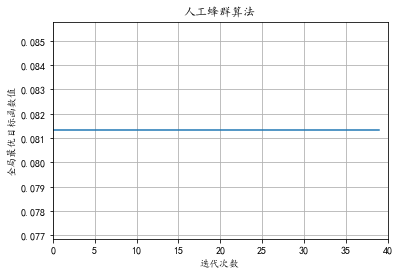

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from ypstruct import structure
import time
import math
import artificial_bee_colony

start = time.time()         #运行开始时刻

# 问题定义
problem = structure()
problem.costfunc = loss
problem.nvar = 3
problem.varmin = .0 * np.ones(3)
problem.varmax = math.log(2) * np.ones(3)

# ABC参数
params = structure()
params.maxit = 40
params.npop = 50
params.nonlooker = 100
params.a = 1

# 运行ABC
out = artificial_bee_colony.run(problem, params)
# 运行结果
plt.rcParams['font.sans-serif'] = ['KaiTi']  #设置字体为楷体
plt.plot(out.bestcost)
print("最优解：{}".format(out.bestsol))
end = time.time()              # 运行结束时刻
print('运行时间：{}s'.format(end-start))

plt.xlim(0, params.maxit)
plt.xlabel('迭代次数')
plt.ylabel('全局最优目标函数值')
plt.title('人工蜂群算法')
plt.grid(True)
plt.show()

In [64]:
out

struct({'bestsol': struct({'position': array([0.67548542, 0.43867688, 0.00332863]), 'cost': 0.08131868131868132}), 'bestcost': array([0.08131868, 0.08131868, 0.08131868, 0.08131868, 0.08131868,
       0.08131868, 0.08131868, 0.08131868, 0.08131868, 0.08131868,
       0.08131868, 0.08131868, 0.08131868, 0.08131868, 0.08131868,
       0.08131868, 0.08131868, 0.08131868, 0.08131868, 0.08131868,
       0.08131868, 0.08131868, 0.08131868, 0.08131868, 0.08131868,
       0.08131868, 0.08131868, 0.08131868, 0.08131868, 0.08131868,
       0.08131868, 0.08131868, 0.08131868, 0.08131868, 0.08131868,
       0.08131868, 0.08131868, 0.08131868, 0.08131868, 0.08131868])})

In [65]:
# test the three models with the test data and print their accuracy scores

print('knn: {}'.format(knn.score(X_test, y_test)))
print('lda: {}'.format(lda.score(X_test, y_test)))
print('gnb: {}'.format(gnb.score(X_test, y_test)))


knn: 0.8859649122807017
lda: 0.631578947368421
gnb: 0.8859649122807017


In [66]:
#create a dictionary of our models
estimators=[('knn', knn), ('lda', lda), ('gnb', gnb)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model to training data
ensemble.fit(X_train, y_train)

#test our model on the test data
ensemble.score(X_test, y_test)

0.9210526315789473